In [63]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load vendorUsageTypes.json
with open('districtAvendorusagetypes.json') as f:
    usage_data = json.load(f)
usage_data = pd.json_normalize(usage_data['vendorUsageTypes'])

# Load vendorProduct.csv
vendor_product_data = pd.read_csv('vendorproduct.csv')
# Load district.json
with open('district.json') as f:
    district_data = json.load(f)

with open('benchmarks_202410011642.json') as f:
    benchmark_data = json.load(f)

# Convert the scores part of district.json to a DataFrame
scores_data = pd.json_normalize(district_data['scores'])

# Check the first few rows to make sure the data loaded correctly
#print(scores_data.head(10))
scores_data.columns.tolist()



['id',
 'ticket',
 'studentId',
 'studentLevel',
 'year',
 'measurementTypeId',
 'subgroup_specialEd',
 'subgroup_lunchStatus',
 'subgroup_gender',
 'subgroup_ethnicity',
 'subgroup_ell',
 'subgroup_bottom25',
 'value_actMathScore',
 'value_actEnglishScore',
 'value_actReadingScore',
 'value_actScienceScore',
 'value_actCompositeScore',
 'value_nweaMath',
 'value_nweaReading',
 'value_nweaEnglish',
 'value_iReadyMath',
 'value_iReadyReading',
 'value_actMasteryComposite',
 'value_actMasteryReading',
 'value_actMasteryMath',
 'value_actMasteryScience',
 'value_actMasteryEnglish',
 'value_nweaELA',
 'value_scantronMath',
 'value_scantronReading',
 'value_mapMath',
 'value_mapEnglish',
 'value_mapReading',
 'value_mapRLA',
 'value_scantronScience',
 'value_scantronLanguage',
 'value_ReadingFoundations',
 'value_scantronAlgebra',
 'value_eocMath',
 'value_actELAScore',
 'value_mapScience',
 'value_LeapELAScale',
 'value_LeapMathScale',
 'value_LeapALScale',
 'value_LeapE2Scale',
 'value_Le

In [64]:
#district A usage data types
usage_data.columns.tolist()

['id',
 'name',
 'districtId',
 'usageTypeId',
 'roiBucketType',
 'initiativeId',
 'vendorId',
 'utilBucketType',
 'weeklyUsageMinutes']

In [65]:
#Benchmark data that 
#benchmark_data.columns.tolist()

In [66]:
#vendor product
vendor_product_data.columns.tolist()

['id', 'vendorId', 'productName']

In [67]:
# Check unique values for each subgroup
subgroup_columns = ['subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 
                    'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25']

# Print unique values for each subgroup
for col in subgroup_columns:
    unique_values = scores_data[col].unique()
    print(f"Unique values in {col}: {unique_values}")


Unique values in subgroup_specialEd: ['0' '1']
Unique values in subgroup_lunchStatus: ['0' '1']
Unique values in subgroup_gender: ['0']
Unique values in subgroup_ethnicity: ['0']
Unique values in subgroup_ell: ['0']
Unique values in subgroup_bottom25: ['0' '1']


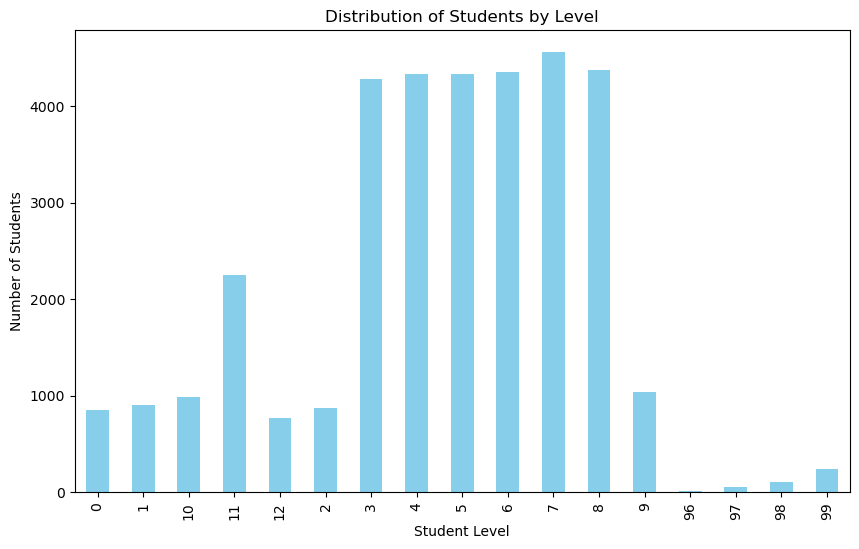

In [68]:
# Count the number of students at each level
student_level_distribution = scores_data['studentLevel'].value_counts().sort_index()

# Plot the distribution of student levels
plt.figure(figsize=(10, 6))
student_level_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Students by Level')
plt.xlabel('Student Level')
plt.ylabel('Number of Students')
plt.show()

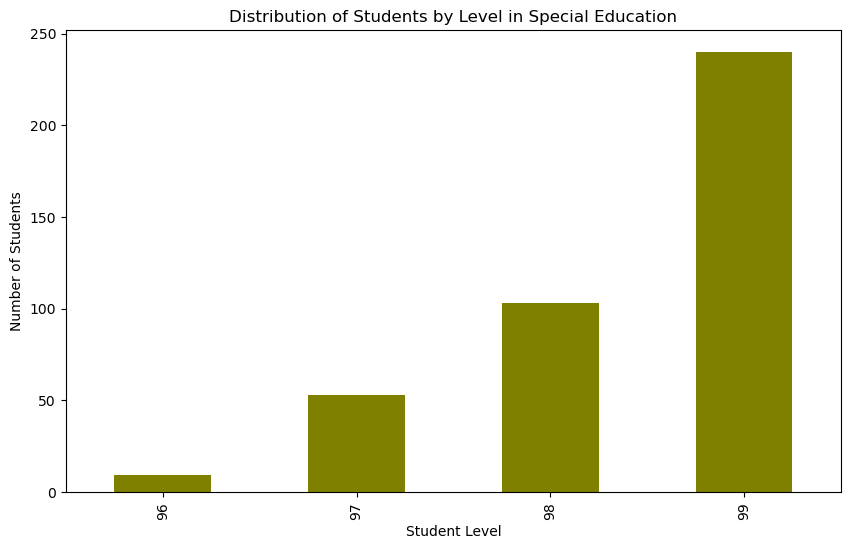

In [77]:
# Convert the 'studentLevel' column to numeric, forcing any errors to NaN
scores_data['studentLevel'] = pd.to_numeric(scores_data['studentLevel'], errors='coerce')

# Count the number of students at each level for levels greater than 95
special_level_distribution = scores_data[scores_data['studentLevel'] > 95]['studentLevel'].value_counts()

# Sort the index 
special_level_distribution = special_level_distribution.sort_index()

# Plot 
plt.figure(figsize=(10, 6))
special_level_distribution.plot(kind='bar', color='olive')
plt.title('Distribution of Students by Level in Special Education')
plt.xlabel('Student Level')
plt.ylabel('Number of Students')
plt.show()



In [39]:
# Convert 'value_scantronMath' to numeric, forcing errors to NaN
scores_data['value_scantronMath'] = pd.to_numeric(scores_data['value_scantronMath'], errors='coerce')

# Drop NaN values
scantron_math_scores = scores_data['value_scantronMath'].dropna()

# Removing zeros or any scores that don't make sense
scantron_math_scores = scantron_math_scores[scantron_math_scores > 0]

# Basic stats to understand the data distribution
print(scantron_math_scores.describe())

count    25302.000000
mean      2528.584262
std        231.665157
min       1266.000000
25%       2391.000000
50%       2540.000000
75%       2672.000000
max       3498.000000
Name: value_scantronMath, dtype: float64


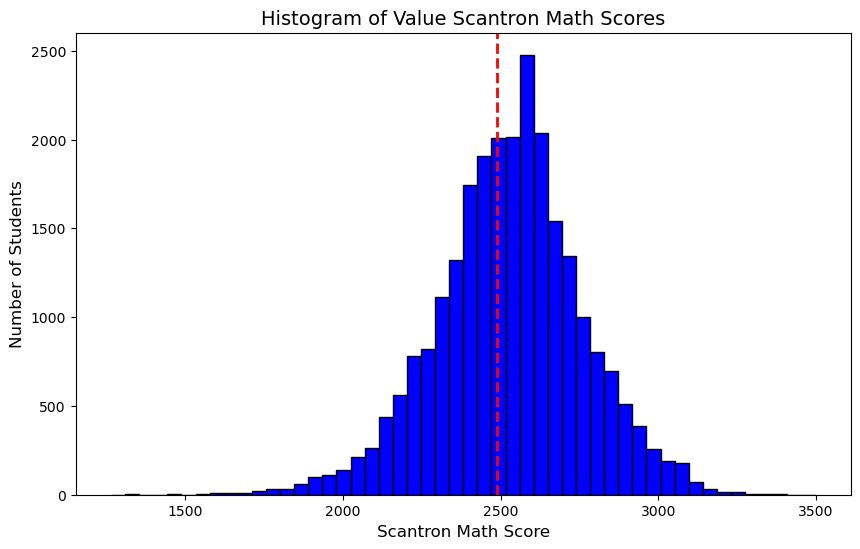

In [78]:
# Filter data by student level (for example, for grade level 3)
#level_3_data = scores_data[scores_data['studentLevel'] == 3]

# Select the specific score column(s) you want to analyze, e.g., ACT Math scores
#act_math_scores_level_3 = level_3_data['value_actMathScore'].dropna()

# Benchmark Score
benchmark_score = 2488
# Plot the histogram for the Scantron Math scores
plt.figure(figsize=(10, 6))
plt.hist(scantron_math_scores, bins=50, color='blue', edgecolor='black')

# Add a benchmark line
plt.axvline(x=benchmark_score, color='red', linestyle='dashed', linewidth=2, label='Benchmark Score: 2488')

# labels and title
plt.title('Histogram of Value Scantron Math Scores', fontsize=14)
plt.xlabel('Scantron Math Score', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

plt.show()




Here we need to maybe figure out which students fall under the cutoff of 2488.


Histogram on Reading scores, cutoff 2678

In [41]:
# Convert 'value_scantronReading' to numeric, force errors to NaN
scores_data['value_scantronReading'] = pd.to_numeric(scores_data['value_scantronReading'], errors='coerce')

# Drop NaN values and remove zeros
scantron_reading_scores = scores_data['value_scantronReading'].dropna()
scantron_reading_scores = scantron_reading_scores[scantron_reading_scores > 0]

# Basic stats to understand the data distribution
print(scantron_reading_scores.describe())

count    25579.000000
mean      2717.877087
std        331.826893
min       1484.000000
25%       2524.000000
50%       2757.000000
75%       2959.000000
max       3700.000000
Name: value_scantronReading, dtype: float64


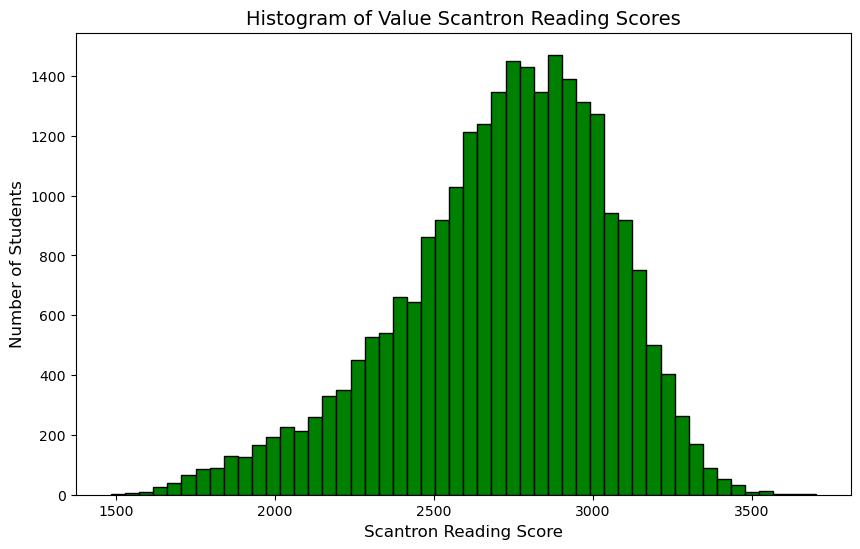

In [42]:
# Create histogram for reading scores
plt.figure(figsize=(10, 6))
plt.hist(scantron_reading_scores, bins=50, color='green', edgecolor='black')
plt.title('Histogram of Value Scantron Reading Scores', fontsize=14)
plt.xlabel('Scantron Reading Score', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.show()



Here we can compare Math vs. Reading Scores

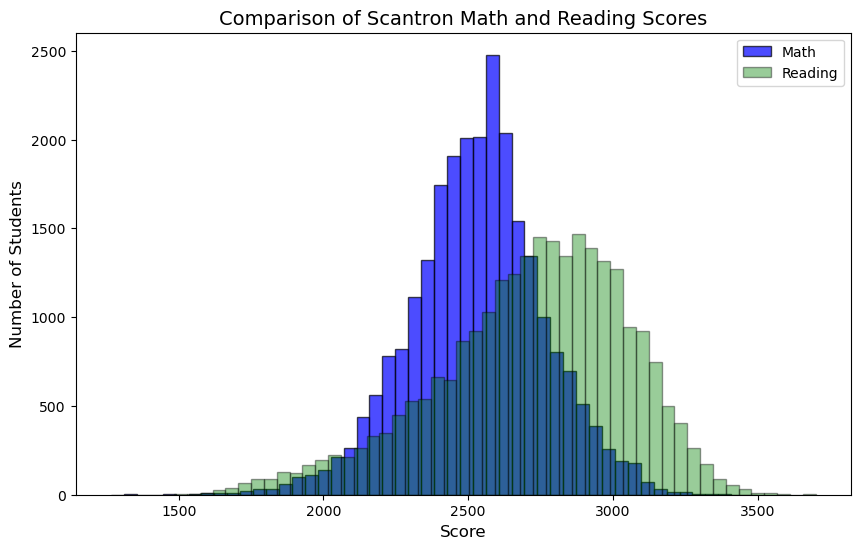

In [43]:
plt.figure(figsize=(10, 6))

# Histogram for math scores
plt.hist(scantron_math_scores, bins=50, color='blue', alpha=0.7, label='Math', edgecolor='black')

# Histogram for reading scores
plt.hist(scantron_reading_scores, bins=50, color='green', alpha=0.4, label='Reading', edgecolor='black')

# labels and title
plt.title('Comparison of Scantron Math and Reading Scores', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend()
plt.show()


Histogram Star Math Scores

In [44]:
# Convert 'value_starMath' to numeric, forcing errors to NaN
scores_data['value_starMath'] = pd.to_numeric(scores_data['value_starMath'], errors='coerce')

# Drop NaN values
star_math_scores = scores_data['value_starMath'].dropna()

# Removing zeros or any scores that don't make sense
star_math_scores = star_math_scores[star_math_scores > 0]

# Basic stats to understand the data distribution
print(star_math_scores.describe())

count    10052.000000
mean      2473.033625
std        231.067685
min       1468.000000
25%       2325.000000
50%       2484.500000
75%       2625.000000
max       3247.000000
Name: value_starMath, dtype: float64


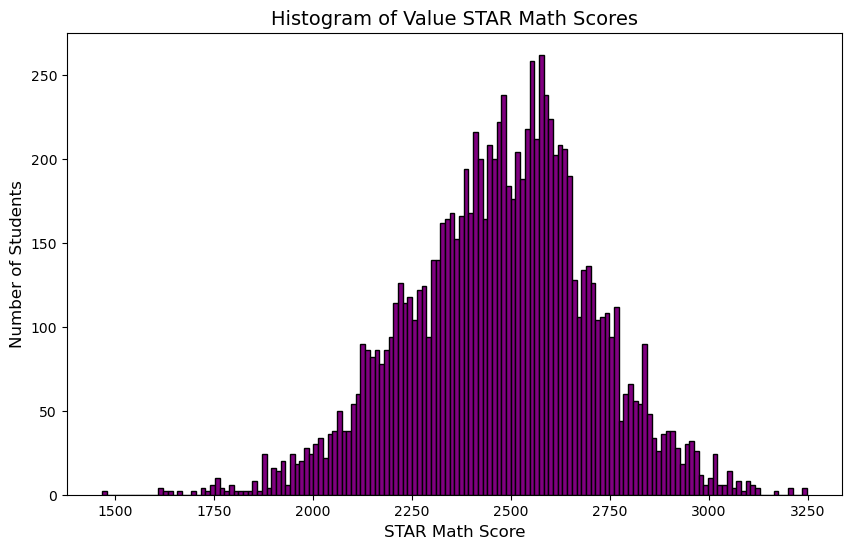

In [45]:
# Plot the histogram for the STAR Math scores
plt.figure(figsize=(10, 6))
plt.hist(star_math_scores, bins=150, color='purple', edgecolor='black')

# labels and title
plt.title('Histogram of Value STAR Math Scores', fontsize=14)
plt.xlabel('STAR Math Score', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

plt.show()

Histogram for Value of ACT Composite Score

In [46]:
# Convert 'value_actCompositeScore' to numeric, forcing errors to NaN
scores_data['value_actCompositeScore'] = pd.to_numeric(scores_data['value_actCompositeScore'], errors='coerce')

# Drop NaN values
act_composite_scores = scores_data['value_actCompositeScore'].dropna()

# Removing zeros or any scores that don't make sense
act_composite_scores = act_composite_scores[act_composite_scores > 0]

# Basic stats to understand the data distribution
print(act_composite_scores.describe())

count    2130.000000
mean       18.182629
std         4.503741
min         7.000000
25%        15.000000
50%        17.000000
75%        21.000000
max        35.000000
Name: value_actCompositeScore, dtype: float64


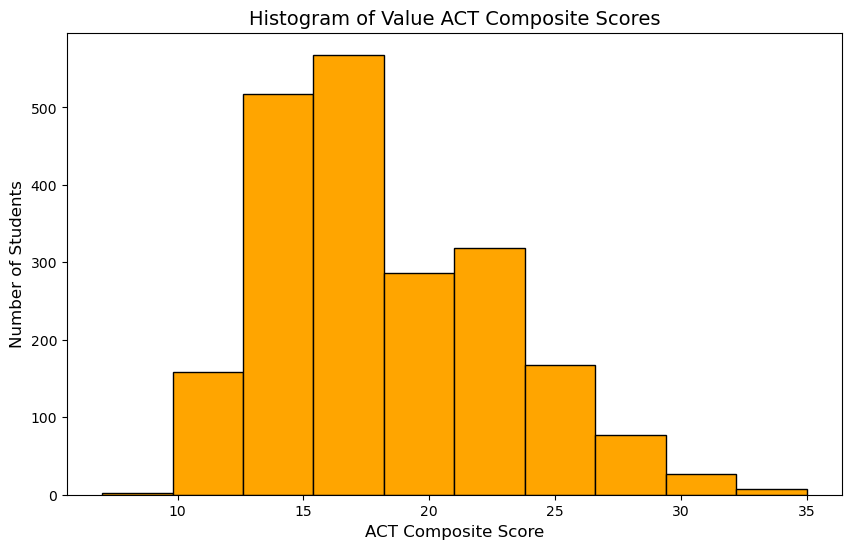

In [47]:
# Plot the histogram for the ACT Composite Scores
plt.figure(figsize=(10, 6))
plt.hist(act_composite_scores, bins=10, color='orange', edgecolor='black')

# labels and title
plt.title('Histogram of Value ACT Composite Scores', fontsize=14)
plt.xlabel('ACT Composite Score', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)


plt.show()

Histogram for ACT Math Score

In [48]:
# Convert 'value_actMathScore' to numeric, forcing errors to NaN
scores_data['value_actMathScore'] = pd.to_numeric(scores_data['value_actMathScore'], errors='coerce')

# Drop NaN values
act_math_scores = scores_data['value_actMathScore'].dropna()

# Removing zeros or any scores that don't make sense
act_math_scores = act_math_scores[act_math_scores > 0]

# Basic stats to understand the data distribution
print(act_math_scores.describe())

count    2131.000000
mean       17.769592
std         3.837416
min         9.000000
25%        15.000000
50%        16.000000
75%        20.000000
max        34.000000
Name: value_actMathScore, dtype: float64


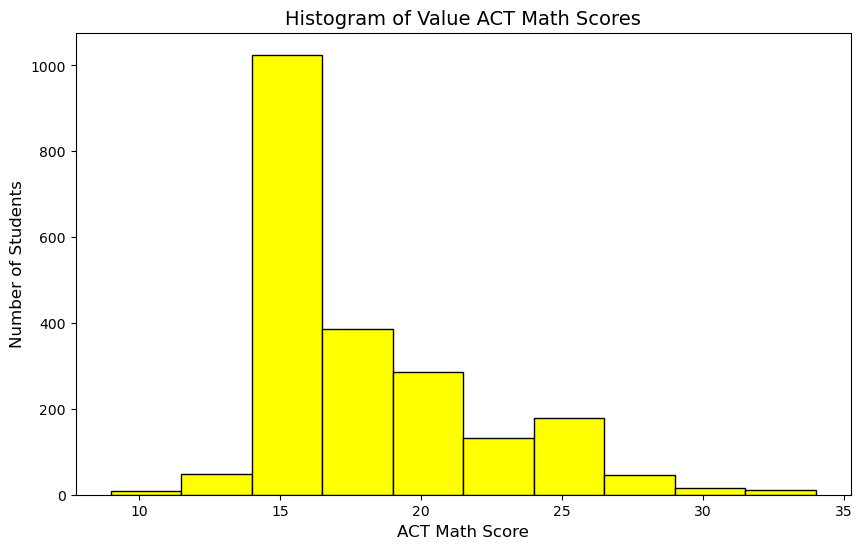

In [49]:
# Plot the histogram for the ACT Math Scores
plt.figure(figsize=(10, 6))
plt.hist(act_math_scores, bins=10, color='yellow', edgecolor='black')

# labels and title
plt.title('Histogram of Value ACT Math Scores', fontsize=14)
plt.xlabel('ACT Math Score', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)


plt.show()


Histogram for ACT Reading Score

In [50]:
# Convert 'value_actReadingScore' to numeric, forcing errors to NaN
scores_data['value_actReadingScore'] = pd.to_numeric(scores_data['value_actReadingScore'], errors='coerce')

# Drop NaN values
value_actReadingScore = scores_data['value_actReadingScore'].dropna()

# Removing zeros or any scores that don't make sense
value_actReadingScore = value_actReadingScore[value_actReadingScore > 0]

# Basic stats to understand the data distribution
print(value_actReadingScore.describe())

count    2130.000000
mean       18.784507
std         5.829908
min         3.000000
25%        15.000000
50%        18.000000
75%        22.000000
max        36.000000
Name: value_actReadingScore, dtype: float64


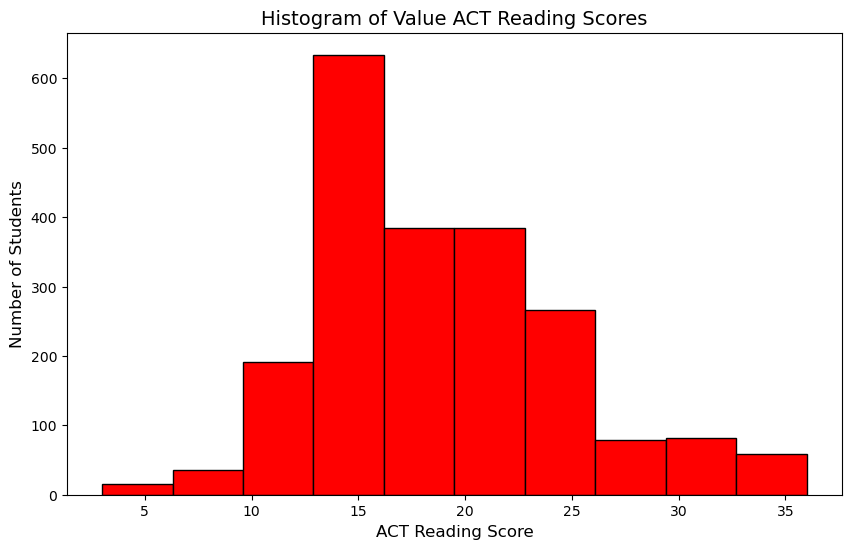

In [51]:

# Plotting the histogram for the ACT Reading Scores
plt.figure(figsize=(10, 6))
plt.hist(value_actReadingScore, bins=10, color='red', edgecolor='black')

# labels and title
plt.title('Histogram of Value ACT Reading Scores', fontsize=14)
plt.xlabel('ACT Reading Score', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)


plt.show()


Histogram ACT Science Score

In [52]:
# Convert 'value_actScienceScore' to numeric, forcing errors to NaN
scores_data['value_actScienceScore'] = pd.to_numeric(scores_data['value_actScienceScore'], errors='coerce')

# Drop NaN values
value_actScienceScore = scores_data['value_actScienceScore'].dropna()

# Removing zeros or any scores that don't make sense
value_actScienceScore = value_actScienceScore[value_actScienceScore > 0]

# Basic stats to understand the data distribution
print(value_actScienceScore.describe())

count    2131.000000
mean       18.380103
std         4.681705
min         1.000000
25%        15.000000
50%        18.000000
75%        22.000000
max        36.000000
Name: value_actScienceScore, dtype: float64


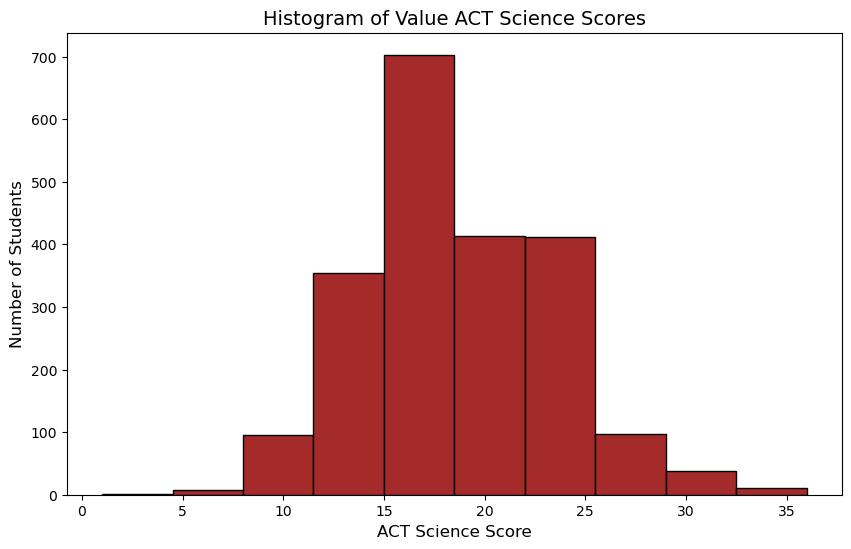

In [53]:
# Plot the histogram for the value_actScienceScore
plt.figure(figsize=(10, 6))
plt.hist(value_actScienceScore, bins=10, color='brown', edgecolor='black')

# labels and title
plt.title('Histogram of Value ACT Science Scores', fontsize=14)
plt.xlabel('ACT Science Score', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)


plt.show()

Lunch Status Subgroup

In [54]:
print(scores_data['subgroup_lunchStatus'].describe())

count     34317
unique        2
top           0
freq      25197
Name: subgroup_lunchStatus, dtype: object


In [55]:
print(scores_data['subgroup_lunchStatus'].value_counts())

subgroup_lunchStatus
0    25197
1     9120
Name: count, dtype: int64


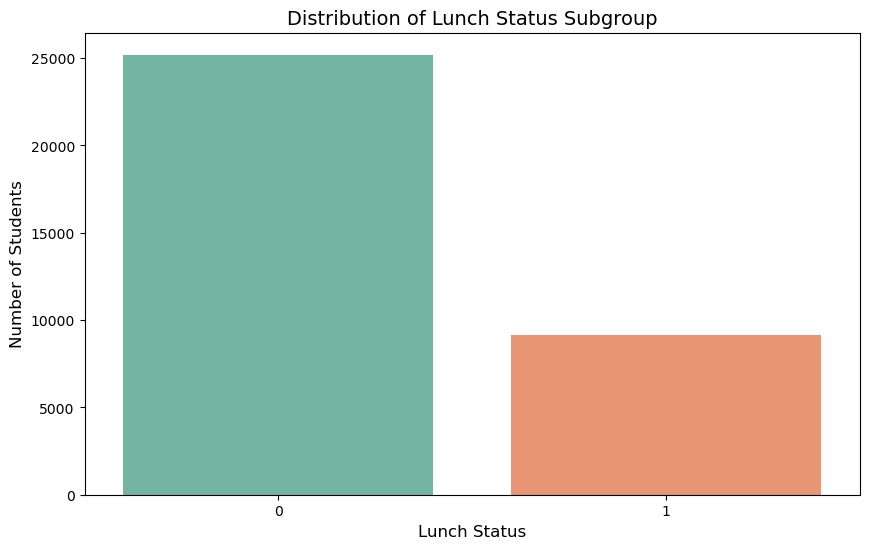

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for 'subgroup_lunchStatus'
plt.figure(figsize=(10, 6))
sns.countplot(data=scores_data, x='subgroup_lunchStatus', palette='Set2')

plt.title('Distribution of Lunch Status Subgroup', fontsize=14)
plt.xlabel('Lunch Status', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.show()


Bottom 25% Subgroup

In [57]:
print(scores_data['subgroup_bottom25'].value_counts())

subgroup_bottom25
0    29207
1     5110
Name: count, dtype: int64


In [58]:
print(scores_data['subgroup_bottom25'].describe())

count     34317
unique        2
top           0
freq      29207
Name: subgroup_bottom25, dtype: object


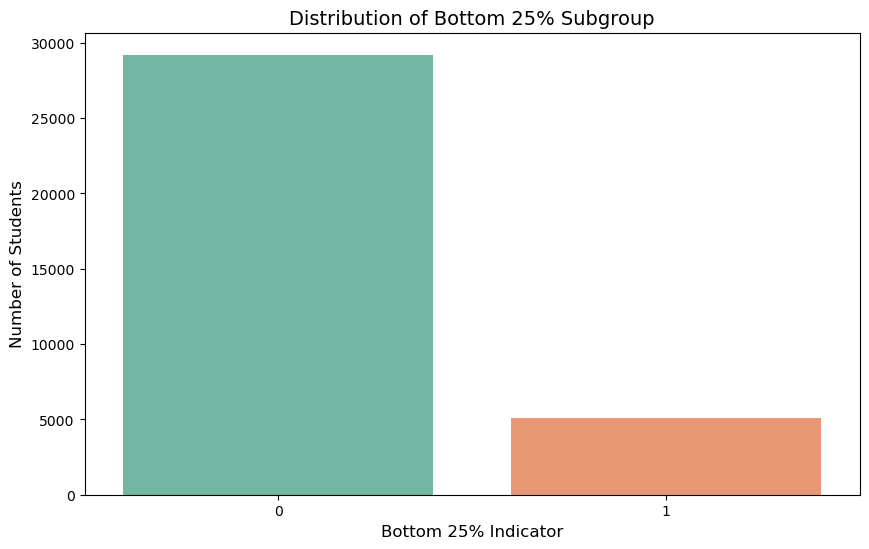

In [59]:
# Plot for 'subgroup_bottom25'
plt.figure(figsize=(10, 6))
sns.countplot(data=scores_data, x='subgroup_bottom25', palette='Set2')

plt.title('Distribution of Bottom 25% Subgroup', fontsize=14)
plt.xlabel('Bottom 25% Indicator', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.show()


Probably should have made this first, but i did not think to check everything until after

Cleaning the scores table or column

In [60]:
# Drop columns with all NaN values
scores_data_cleaned = scores_data.dropna(axis=1, how='all')

# Drop columns with the same value across all rows
scores_data_cleaned = scores_data_cleaned.loc[:, (scores_data_cleaned != scores_data_cleaned.iloc[0]).any()]

# Drop columns where more than 90% of the values are zero or NaN
threshold = 0.9  # We can adjust this
scores_data_cleaned = scores_data_cleaned.drop(columns=[col for col in scores_data_cleaned.columns if (scores_data_cleaned[col] == 0).mean() > threshold])

# Here we drop columns with all NaN values
scores_data_cleaned = scores_data.dropna(axis=1, how='all')

# Drop columns with constant values
scores_data_cleaned = scores_data_cleaned.loc[:, (scores_data_cleaned != scores_data_cleaned.iloc[0]).any()]

# Drop columns with mostly zeros or NaN values (more than 90%)
threshold = 0.9  # We can adjust this
scores_data_cleaned = scores_data_cleaned.drop(columns=[col for col in scores_data_cleaned.columns if (scores_data_cleaned[col] == 0).mean() > threshold])

print(scores_data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34317 entries, 0 to 34316
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     34317 non-null  object 
 1   ticket                 34317 non-null  object 
 2   studentId              34317 non-null  object 
 3   studentLevel           34317 non-null  object 
 4   year                   34317 non-null  object 
 5   measurementTypeId      34317 non-null  object 
 6   subgroup_specialEd     34317 non-null  object 
 7   subgroup_lunchStatus   34317 non-null  object 
 8   subgroup_bottom25      34317 non-null  object 
 9   value_actEnglishScore  34317 non-null  object 
 10  value_scantronMath     33888 non-null  float64
 11  value_scantronReading  34317 non-null  int64  
 12  value_starMath         34317 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 3.4+ MB
None


In [62]:
# Filter for special education students in levels 96–99
special_ed_students = scores_data[scores_data['subgroup_specialEd'] == 'Yes']

# Filter for English Language Learners in levels 96–99
ell_students = scores_data[scores_data['subgroup_ell'] == 'Yes']

# Display results
print("Special Education students in levels 96-99:\n", special_ed_students)
print("ELL students in levels 96-99:\n", ell_students)


Special Education students in levels 96-99:
 Empty DataFrame
Columns: [id, ticket, studentId, studentLevel, year, measurementTypeId, subgroup_specialEd, subgroup_lunchStatus, subgroup_gender, subgroup_ethnicity, subgroup_ell, subgroup_bottom25, value_actMathScore, value_actEnglishScore, value_actReadingScore, value_actScienceScore, value_actCompositeScore, value_nweaMath, value_nweaReading, value_nweaEnglish, value_iReadyMath, value_iReadyReading, value_actMasteryComposite, value_actMasteryReading, value_actMasteryMath, value_actMasteryScience, value_actMasteryEnglish, value_nweaELA, value_scantronMath, value_scantronReading, value_mapMath, value_mapEnglish, value_mapReading, value_mapRLA, value_scantronScience, value_scantronLanguage, value_ReadingFoundations, value_scantronAlgebra, value_eocMath, value_actELAScore, value_mapScience, value_LeapELAScale, value_LeapMathScale, value_LeapALScale, value_LeapE2Scale, value_LeapGmScale, value_LeapBlScale, value_LeapE3Scale, value_LeapUsScale